# **Importing necessary libraries**
**numpy**: This library is commonly used for numerical operations and array manipulation. It provides support for mathematical functions on arrays and matrices.

**networkx**: NetworkX is a Python library for creating, analyzing, and visualizing complex networks or graphs. It offers tools for the study of the structure, dynamics, and functions of networks.

**matplotlib.pyplot**: Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. The pyplot module provides a MATLAB-like interface for creating plots and visualizations.

**random**: This module provides functions for generating random numbers. It is commonly used for tasks such as random sampling, shuffling, and generating random values within a specified range.

In [1]:
import numpy as np                  # For numerical operations
import networkx as nx               # For creating and manipulating graphs
import matplotlib.pyplot as plt     # For plotting graphs and visualizations
import random                       # For generating random numbers

# **Reads the Siouxfallcri.gml file**
* Reads the graph from a GML file named Siouxfallcri.gml using `NetworkX's read_gml()` function.

* Define a list of hospitals, where each hospital is represented by a node in the graph.

* Finally, it creates a list containing all the nodes present in the graph.

In [2]:
# Read the graph from the file
graph = nx.read_gml('Siouxfallcri.gml')

# Define the list of hospitals
hospitals = ['n7', 'n9', 'n22']

# Get a list of all nodes in the graph
all_nodes = list(graph.nodes)

# **Function to generate current data for the network edges**
This function generates current data for the edges in the network graph.

It iterates over each edge in the graph, retrieves the length and speed attributes (defaulting to 1 if not provided), calculates the minimum and maximum travel times based on the length and speed, generates a random speed within the range [0, speed], and stores this information in a list of tuples.

The resulting list contains edge data for the network.

In [3]:
def network_current_data():
    """
    Function to generate current data for the network edges.

    Returns:
    new_data (list): List containing tuples of edge data, each tuple containing:
                     (source node, target node, minimum travel time, maximum travel time, speed, random speed).
    """
    new_data = []
    for u, v, data in graph.edges(data=True):
        # Get the length of the edge, defaulting to 1 if not provided
        length = data.get('length', 1)
        # Get the speed of the edge, defaulting to 1 if not provided
        speed = data.get('speed', 1)
        # Generate a random speed within the range [0, speed]
        random_speed = random.uniform(0, speed)
        # Calculate the minimum and maximum travel times based on length and speed
        t_min = length / speed
        t_max = 2 * t_min
        # Append the edge data to the new_data list
        new_data.append((u, v, t_min, t_max, speed, random_speed))
    return new_data

# **Function to determine if the specified location is a terminal state**
This function takes a `node` as input and checks if it is a `terminal state`,

i.e., if it corresponds to one of the hospitals. It iterates over the list of hospitals and returns `True` if the current node matches any of the hospital nodes, indicating that it is a terminal state. Otherwise, it returns `False`.

In [4]:
def is_terminal_node(current_node):
    """
    Function to determine if the specified location is a terminal state.

    Args:
    current_node (str): The node to check.

    Returns:
    state (bool): True if the node is a hospital (terminal state), False otherwise.
    """
    state = False
    for hospital in hospitals:
        if current_node == hospital:
            state = True
    return state

# **Function to calculate the expected traverse time between two nodes in the network**
This function calculates the expected traversal time between source and target nodes based on network congestion.

It takes into account the speed of the link, random speed due to congestion, and transition probabilities between congestion states.

The function returns the expected traversal time as a float value. If the source and target nodes are not found in the list, it returns a message indicating the absence of the nodes.

In [5]:
def expected_traverse_time(source, target, new_data):
    """
    Calculate the expected traversal time between source and target nodes based on network congestion.

    Args:
    - source (str): Source node.
    - target (str): Target node.
    - new_data (list): List of tuples containing edge data (u, v, t_min, t_max, speed, random_speed).

    Returns:
    - float: Expected traversal time between source and target nodes.
    """
    for item in new_data:
        if item[0] == source and item[1] == target:
            speed = item[4]  # Max speed of the link
            random_speed = item[5]  # Randomized speed due to congestion
            if random_speed < speed / 2:
                nc_to_nc = random.uniform(0, 1)  # Probability of no congestion to congestion
                nc_to_c = 1 - nc_to_nc  # Probability of congestion to no congestion
                expected_time = (nc_to_nc * item[2]) + (nc_to_c * item[3])  # Expected traversal time
                return expected_time
            elif random_speed >= speed / 2:
                c_to_c = random.uniform(0, 1)  # Probability of congestion to congestion
                c_to_nc = 1 - c_to_c  # Probability of congestion to no congestion
                expected_time = (c_to_c * item[3]) + (c_to_nc * item[2])  # Expected traversal time
                return expected_time
    return "Source and target not found in the list"

# **Function to get possible target nodes reachable from the current node**
This function takes a `current node` as input and returns a `list of possible target nodes` reachable from that node in the network graph.

It retrieves the list of edges connected to the current node and extracts the target node of each edge, appending it to the list of possible targets. Finally, it returns the list of possible target nodes.

In [6]:
def get_possible_targets(current_node):
    """
    Function to get possible target nodes reachable from the current node.

    Args:
    current_node (str): The current node.

    Returns:
    possible_targets (list): List of possible target nodes reachable from the current node.
    """
    possible_targets = []
    edges_list = graph.edges(current_node)  # Get the list of edges connected to the current node
    for item in edges_list:
        possible_targets.append(item[1])    # Append the target node of each edge to the list of possible targets
    return possible_targets

# **Function to choose a random, non-terminal starting location**

This function selects a random starting node from the list of all nodes in the graph.

If the randomly selected node is a terminal node (e.g., a hospital), it continues selecting nodes until a non-terminal node is chosen.

Finally, it returns the randomly selected non-terminal starting node.

In [7]:
def get_starting_state(all_nodes):
    """
    Choose a random, non-terminal starting location.

    Args:
    - all_nodes (list): List of all nodes in the graph.

    Returns:
    - str: Random, non-terminal starting node.
    """
    # Get a random state
    current_node = random.choice(all_nodes)

    # Continue choosing random state until a non-terminal state is identified
    while is_terminal_node(current_node):
        current_node = random.choice(all_nodes)

    return current_node

# **Function to perform backward algorithm for finding the shortest path from end to start node**

This function implements a backward search algorithm to find the shortest path between a start node and an end node in a graph.

It initializes dictionaries to store node values, backpointers, and a frontier.

Then, it updates the values and backpointers until it reaches the start node.

Finally, it reconstructs the shortest path using the backpointers and returns the total expected traverse time and the shortest path.

In [8]:
def backward_algorithm(graph, new_data, start, end):
    """
    Find the shortest path between start and end nodes using backward search.

    Args:
    - graph (networkx.Graph): The graph representing the network.
    - new_data (list): List containing information about each edge in the graph.
    - start (str): The starting node.
    - end (str): The destination node.

    Returns:
    - tuple: A tuple containing the total expected traverse time and the shortest path.
    """
    # Initialize dictionaries for node values, backpointers, and frontier
    values = {node: float('inf') for node in graph.nodes}
    values[end] = 0
    backpointers = {node: None for node in graph.nodes}
    frontier = [(end, 0)]

    # Update values and backpointers until the start node is reached
    while frontier:
        current_node, current_value = frontier.pop(0)
        if current_node == start:
            break
        for neighbor in graph.predecessors(current_node):
            expected_time = expected_traverse_time(neighbor, current_node, new_data)
            new_value = current_value + expected_time
            if new_value < values[neighbor]:
                values[neighbor] = new_value
                backpointers[neighbor] = current_node
                frontier.append((neighbor, new_value))

    # Use backpointers to reconstruct the shortest path
    shortest_path = []
    current_node = start
    while current_node != end:
        shortest_path.append(current_node)
        current_node = backpointers[current_node]
    shortest_path.append(end)

    # Return the total expected traverse time and the shortest path
    return values[start], list(reversed(shortest_path))

# **Function to calculate all shortest paths from hospitals to all other nodes in the graph**

This function calculates the shortest paths from each hospital to all other nodes in the graph using the backward algorithm.

It returns a dictionary where keys are hospital nodes, and values are dictionaries containing lengths and paths to other nodes.

In [9]:
def calculate_all_shortest_paths(graph, hospitals, new_data):
    """
    Calculate the shortest paths from each hospital to all other nodes in the graph.

    Args:
    - graph (networkx.Graph): The graph representing the network.
    - hospitals (list): List of hospital nodes.
    - new_data (list): List containing information about each edge in the graph.

    Returns:
    - dict: A dictionary containing the shortest paths from each hospital to all other nodes.
            Keys are hospital nodes, and values are dictionaries containing lengths and paths.
    """
    shortest_paths = {}
    # Iterate over each hospital
    for hospital in hospitals:
        shortest_paths[hospital] = {}
        # Iterate over all nodes in the graph
        for node in graph.nodes:
            # Exclude the hospital itself
            if node != hospital:
                # Calculate the shortest path from the hospital to the current node
                length, path = backward_algorithm(graph, new_data, hospital, node)
                # Store the length and path in the shortest paths dictionary
                shortest_paths[hospital][node] = (length, path)
    return shortest_paths

# **Function to calculate all shortest paths from each node to all hospitals in the graph.**

This function calculates the shortest paths from each node to all hospitals in the graph using the backward algorithm.

It returns a dictionary where keys are nodes, and values are dictionaries containing lengths and paths to all hospitals.

In [10]:
def calculate_all_Back_shortest_paths(graph, hospitals, new_data):
    """
    Calculate the shortest paths from each node to all hospitals in the graph.

    Args:
    - graph (networkx.Graph): The graph representing the network.
    - hospitals (list): List of hospital nodes.
    - new_data (list): List containing information about each edge in the graph.

    Returns:
    - dict: A dictionary containing the shortest paths from each node to all hospitals.
            Keys are nodes, and values are dictionaries containing lengths and paths.
    """
    shortest_paths = {}
    # Iterate over all nodes in the graph
    for node in graph.nodes:
        shortest_paths[node] = {}
        # Iterate over each hospital
        for hospital in hospitals:
            # Exclude the node itself
            if hospital != node:
                # Calculate the shortest path from the node to the hospital
                length, path = backward_algorithm(graph, new_data, node, hospital)
                # Store the length and path in the shortest paths dictionary
                shortest_paths[node][hospital] = (length, path)
    return shortest_paths

# **Function to update the capacity of each hospital based on the number of patients arriving at each hospital**

This function updates the count of patients in each hospital and removes a hospital if it reaches its capacity.

It also writes a message to a file `data.txt` indicating which hospital is full.

In [11]:
def The_capacity_of_each_hospital(path, hospitals_capacity, nbrpaston7, nbrpaston9, nbrpaston22):
    """
    Update the number of patients in each hospital and remove the hospital if it reaches capacity.

    Args:
    - path (list): Path taken by a patient, represented as a list of node IDs.
    - hospitals_capacity (int): Maximum capacity of each hospital.
    - nbrpaston7 (int): Current number of patients in hospital n7.
    - nbrpaston9 (int): Current number of patients in hospital n9.
    - nbrpaston22 (int): Current number of patients in hospital n22.

    Returns:
    - tuple: Updated counts of patients in hospitals (nbrpaston7, nbrpaston9, nbrpaston22).
    """
    if path[-1] == 'n7':
        nbrpaston7 += 1
        if nbrpaston7 == hospitals_capacity:
            if 'n7' in hospitals:
                del_index = hospitals.index('n7')
                del hospitals[del_index]
                fichier = open("data.txt", "a")
                fichier.write("\n"+' The hospital n7 is full ')
                fichier.close()
    elif path[-1] == 'n9':
        nbrpaston9 += 1
        if nbrpaston9 == hospitals_capacity:
            if 'n9' in hospitals:
                del_index = hospitals.index('n9')
                del hospitals[del_index]
                fichier = open("data.txt", "a")
                fichier.write("\n"+' The hospital n9 is full ')
                fichier.close()
    elif path[-1] == 'n22':
        nbrpaston22 += 1
        if nbrpaston22 == hospitals_capacity:
            if 'n22' in hospitals:
                del_index = hospitals.index('n22')
                del hospitals[del_index]
                fichier = open("data.txt", "a")
                fichier.write("\n"+' The hospital n22 is full ')
                fichier.close()
    return nbrpaston7, nbrpaston9, nbrpaston22

# **Function calculates the number of occurrences of each edge**

This function calculates the number of occurrences of each edge in a given path and returns them sorted by count in descending order.

It takes a path and a list of all edges as input.

In [12]:
def number_paths_in_road(path, all_edges):
    """
    Calculate the number of occurrences of each edge in a path and sort them by count.

    Args:
    - path (list): Path taken by a patient, represented as a list of node IDs.
    - all_edges (list): List of all edges in the graph.

    Returns:
    - list: Sorted list of edges based on their count in the path, in descending order.
    """
    # Create a dictionary to store the count of each edge
    all_edges_dict = {(u, v): cont for u, v, cont in all_edges}

    # Iterate over pairs of nodes in the path
    for u, v in zip(path, path[1:]):
        # Increment the count for the edge if it exists in the dictionary
        if (u, v) in all_edges_dict:
            all_edges_dict[(u, v)] += 1

    # Convert the dictionary back to a list of tuples
    all_edges = [(u, v, cont) for (u, v), cont in all_edges_dict.items()]

    # Sort the edges based on their count in descending order
    sort_edges = sorted(all_edges, key=lambda x: x[2], reverse=True)

    return sort_edges

# **Function Simulate the transportation of casualties from disaster site to hospitals and record the results**

This function simulates the transportation of casualties from a disaster site to hospitals, recording the results including path and time for each casualty.

It iterates over the specified number of casualties, calculating shortest paths from the disaster site to hospitals for each and updating hospital capacities and road occurrences accordingly.

Additionally, it calculates backward shortest paths from hospitals to the disaster site for each previous casualty and accumulates the total time with these paths.

The simulation data including paths and times is recorded in a file named `data.txt`.

Finally, the function returns the updated list of edges and the total time elapsed in the simulation.

In [13]:
def Simulation(number_casualties, hospitals, total_time, all_edges):
    """
    Simulate the transportation of casualties from disaster site to hospitals and record the results.

    Args:
    - number_casualties (int): Number of casualties to simulate.
    - hospitals (list): List of hospital nodes.
    - total_time (float): Total time elapsed in the simulation.
    - all_edges (list): List of all edges in the graph.

    Returns:
    - tuple: Updated list of edges and total time elapsed.
    """
    nbrpaston7 = 0
    nbrpaston9 = 0
    nbrpaston22 = 0
    back = 'n1'  # Starting node for backward traversal
    fichier = open("data.txt", "a")  # Open a file for recording simulation data

    for i in range(number_casualties):
        time_travl = float('inf')
        start_node = get_starting_state(all_nodes)  # Get random starting node for each casualty
        if i != 0:
            # Calculate backward shortest path from hospital to disaster site for the previous casualty
            shortest_paths_back = calculate_all_Back_shortest_paths(graph, hospitals, network_current_data())

            # Accumulate total time with the backward path
            total_time += shortest_paths_back.get(start_node).get(back)[0]

            # Record the backward path and time in the file
            back_path = shortest_paths_back.get(start_node).get(back)[1]
            fichier.write("\n" + 'Time from hospital to disaster site : ' + str(total_time) +' | '+ ' Path : ' + '->'.join([str(elem) for elem in back_path]))

            # Update hospital capacities and road occurrences based on the backward path
            nbrpaston7, nbrpaston9, nbrpaston22 = The_capacity_of_each_hospital(back_path, hospitals_capacity, nbrpaston7, nbrpaston9, nbrpaston22)
            all_edges = number_paths_in_road(back_path, all_edges)

        # Calculate shortest paths from disaster site to hospitals for the current casualty
        shortest_paths = calculate_all_shortest_paths(graph, hospitals, network_current_data())

        # Find the hospital with the shortest arrival time for the current casualty
        for hospital in hospitals:
            timeexp = shortest_paths.get(hospital).get(start_node)[0]
            if timeexp < time_travl:
                time_travl = timeexp
                path = shortest_paths.get(hospital).get(start_node)[1]
                back = path[-1]  # Update the starting node for the next backward traversal

        # Record the forward path and time in the file
        fichier.write("\n" + 'Time from disaster site to hospital  : ' + str(total_time) +' | '+ ' Path : ' + '->'.join([str(elem) for elem in path]))

        # Update road occurrences based on the forward path
        all_edges = number_paths_in_road(path, all_edges)

        # Accumulate total time with the forward path
        total_time += time_travl

    fichier.close()  # Close the file after recording all simulation data
    return all_edges, total_time

This code initializes the parameters for the `first simulation`, runs the simulation, and records the results in the `data.txt` file.

Finally, it prints the updated edges after the simulation and records the duration of the simulation in the same file.

In [14]:
totale_time = 0  # Initialize the total time
hospitals = ['n7', 'n9', 'n22']  # List of hospital nodes
number_casualties = 250  # Number of simulated casualties
hospitals_capacity = 100  # Maximum capacity of each hospital
all_edges = [(u, v, 0) for u, v in graph.edges()]  # List of all edges in the graph, initialized with zero counts

# Open the file for writing simulation data
fichier = open("data.txt", "a")
fichier.write('The First Simulation "before deleting the critical edge" ')
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.close()

# Perform the first simulation
all_edges, totale_time = Simulation(number_casualties, hospitals, totale_time, all_edges)

# Open the file for writing simulation duration
fichier = open("data.txt", "a")
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.write("\n"+'Duration of the first simulation : '+str(totale_time))
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.close()

# **Draw the graph before the simulation**
This code snippet visualizes the graph representing the network with node labels and hospital nodes highlighted in red.

It uses the Spring layout algorithm for positioning nodes and displays the graph using Matplotlib.

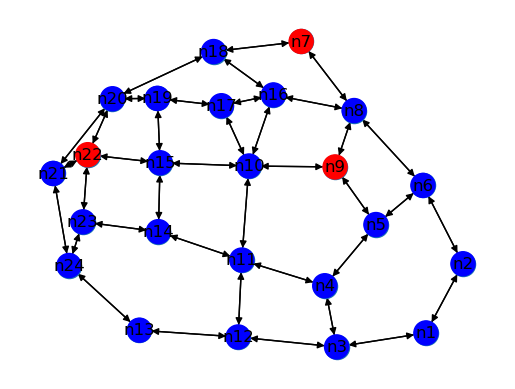

In [15]:
# Draw the graph with node labels
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True)

# Highlight the hospital nodes with a different color
node_colors = ['red' if node in hospitals else 'blue' for node in graph.nodes]
nx.draw_networkx_nodes(graph, pos, node_color=node_colors)

# Display the graph
plt.axis('off')
plt.show()

# **Identify and remove the critical edge**
This code removes the `critical edge` from the graph, records information about the removed edge and the start of the `second simulation` in the `data.txt` file.

Then, it resets the parameters for the second simulation, performs the simulation, and records the duration of the second simulation in the same file.

In [16]:
# Remove the critical edge from the graph
graph.remove_edge(all_edges[0][0], all_edges[0][1])
graph.remove_edge(all_edges[1][0], all_edges[0][0])

# Open the file for writing information about the critical edge and the second simulation
fichier = open("data.txt", "a")
fichier.write("\n" + 'The critical edge : ' + all_edges[0][0] + ' -> ' + all_edges[0][1])
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.write("\n" + 'The second Simulation "after deleting the critical edge"  ')
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.close()

# Reset total time and parameters for the second simulation
totale_time = 0
hospitals = ['n7', 'n9', 'n22']
number_casualties = 250
hospitals_capacity = 100
all_edges = [(u, v, 0) for u, v in graph.edges()]

# Perform the second simulation
all_edges, totale_time = Simulation(number_casualties, hospitals, totale_time, all_edges)

# Open the file for writing the duration of the second simulation
fichier = open("data.txt", "a")
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.write("\n" + 'Duration of the second simulation : ' + str(totale_time))
fichier.write("\n"+'-------------------------------------------------------------------')
fichier.close()

# **Draw the graph after the simulation**
This code snippet visualizes the graph with node labels and hospital nodes highlighted in red.

It uses the spring layout algorithm for node positioning and displays the graph without axis labels.

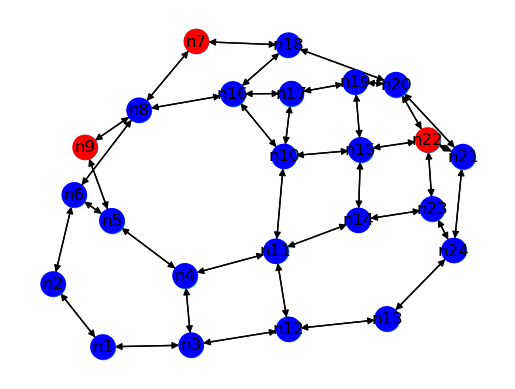

In [17]:
# Draw the graph with node labels and hospital nodes highlighted
pos = nx.spring_layout(graph)  # Position nodes using the spring layout algorithm
nx.draw_networkx(graph, pos, with_labels=True)  # Draw the network with node labels

# Highlight the hospital nodes with a different color
node_colors = ['red' if node in hospitals else 'blue' for node in graph.nodes]
nx.draw_networkx_nodes(graph, pos, node_color=node_colors)

# Display the graph
plt.axis('off')  # Turn off axis labels
plt.show()  # Show the plot